In [2]:
import pandas as pd
import numpy as np
import math
import scipy.stats.stats 
import seaborn

In [3]:
boxes = pd.read_csv("boxes.csv")

In [4]:
boxes.head()

,instance,width,height,weight
0,box 1,4,4.0,2.5
1,box 2,4,2.5,4.0


In [5]:
type(boxes)

pandas.core.frame.DataFrame

In [6]:
boxes.dtypes

instance     object
 width        int64
 height     float64
 weight     float64
dtype: object

In [ ]:
boxes.describe()

In [7]:
boxes.columns

Index(['instance', ' width', ' height', ' weight'], dtype='object')

In [8]:
boxes.columns = [ ci.strip() for ci in boxes.columns ]

In [9]:
boxes.columns

Index(['instance', 'width', 'height', 'weight'], dtype='object')

In [10]:
boxes.set_index("instance", inplace=True)

In [11]:
boxes['width']

instance
box 1    4
box 2    4
Name: width, dtype: int64

In [12]:
value_columns = [ ci for ci in boxes.columns if ci != "instance" ]

In [13]:
value_columns

['width', 'height', 'weight']

In [14]:
boxes = boxes[value_columns]

In [15]:
boxes

,width,height,weight
instance,,,
box 1,4,4.0,2.5
box 2,4,2.5,4.0


In [16]:
boxes.columns

Index(['width', 'height', 'weight'], dtype='object')

In [17]:
boxes["width"]

instance
box 1    4
box 2    4
Name: width, dtype: int64

In [18]:
np.array(boxes["width"])

array([4, 4])

In [19]:
np.array(boxes.iloc[1, ])

array([4. , 2.5, 4. ])

In [20]:
box_2 = np.array(boxes.loc["box 2", :])
print(box_2)

[4.  2.5 4. ]


In [21]:
box_1 = np.array(boxes.loc["box 1", :])
print(box_1)

[4.  4.  2.5]


In [22]:
box_1

array([4. , 4. , 2.5])

In [23]:
box_1[0]

4.0

In [24]:
box_1[1]

4.0

In [25]:
box_2 - box_1

array([ 0. , -1.5,  1.5])

In [26]:
box_1 / 2

array([2.  , 2.  , 1.25])

In [27]:
np.mean(box_1)

3.5

In [28]:
def mean_square_diff(v1, v2):
    return np.mean([ (v1[i] - v2[i])**2 for i in range(len(v1)) ])

In [29]:
mean_square_diff(box_1, box_1)

0.0

In [30]:
mean_square_diff(box_1, box_2)

1.5

In [31]:
def unit_scale(vec):
    """Scale vector to be  unit length"""
    vec = vec / math.sqrt(np.dot(vec, vec))
    return vec

In [32]:
box_1_scaled = unit_scale(box_1)
print(box_1_scaled)

[0.64676167 0.64676167 0.40422604]


In [33]:
box_2_scaled = unit_scale(box_2)
print(box_2_scaled)

[0.64676167 0.40422604 0.64676167]


In [34]:
np.dot(box_1_scaled, box_2_scaled)

0.9411764705882353

In [35]:
def center_unit_scale(vec):
    """Shift and scale vector to be mean zero and unit length"""
    vec = vec - np.mean(vec)
    vec = vec / math.sqrt(np.dot(vec, vec))
    return vec

In [36]:
box_1_std = center_unit_scale(box_1)

In [37]:
box_1_std

array([ 0.40824829,  0.40824829, -0.81649658])

In [38]:
np.mean(box_1_std)

0.0

In [39]:
np.dot(box_1_std, box_1_std)

1.0000000000000002

In [40]:
box_2_std = center_unit_scale(box_2)

In [41]:
box_2_std

array([ 0.40824829, -0.81649658,  0.40824829])

In [42]:
np.dot(box_1_std, box_2_std)

-0.5000000000000001

In [43]:
scipy.stats.stats.pearsonr(box_1, box_2)

(-0.5, 0.6666666666666666)

In [45]:
help(scipy.stats.stats.pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Calculate a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed, and not necessarily zero-mean.
    Like other correlation coefficients, this one varies between -1 and +1
    with 0 implying no correlation. Correlations of -1 or +1 imply an exact
    linear relationship. Positive correlations imply that as x increases, so
    does y. Negative correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 5

In [46]:
plot_frame = boxes.T
plot_frame["measure"] = plot_frame.index
plot_frame

instance,box 1,box 2,measure
width,4.0,4.0,width
height,4.0,2.5,height
weight,2.5,4.0,weight


In [47]:
plot_frame.columns

Index(['box 1', 'box 2', 'measure'], dtype='object', name='instance')

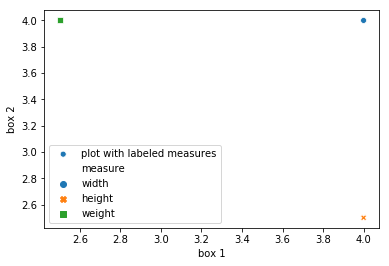

In [48]:
seaborn.scatterplot(data=plot_frame, x="box 1", y="box 2", 
                    hue="measure", style="measure", 
                    label="plot with labeled measures")

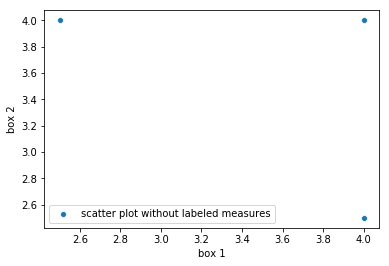

In [49]:
seaborn.scatterplot(data=plot_frame, x="box 1", y="box 2",
                    label="scatter plot without labeled measures")

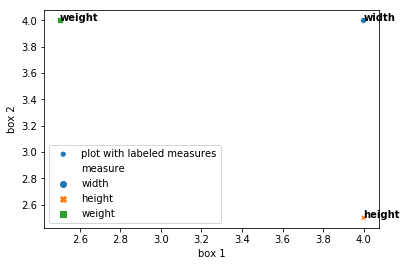

In [50]:
plt = seaborn.scatterplot(data=plot_frame, x="box 1", y="box 2", 
                    hue="measure", style="measure", 
                    label="plot with labeled measures")
for i in range(0, plot_frame.shape[0]):
     plt.text(plot_frame["box 1"][i], plot_frame["box 2"][i], plot_frame["measure"][i], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')